In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import json

In [9]:
data = {}
paramsNameList = []

batchNames = ['v5_batch13', 'v5_batch14'] # 'weight': 0.19,  'weight': 0.72

batchName = 'v5_batch13'  # Th->S1 ampa 'weight': 0.19
paramsName  = 'Weak'
paramsNameList.append(paramsName)
with open('../../Documentos/data_S1_Rat/' + batchName + '/' + batchName + '_' + str(p1) + '_0.json', 'r') as f:
    data[paramsName] = json.load(f) 


batchName = 'v5_batch14'  # Th->S1 ampa 'weight': 0.72
paramsName  = 'Strong'
paramsNameList.append(paramsName)
with open('../../Documentos/data_S1_Rat/' + batchName + '/' + batchName + '_' + str(p1) + '_0.json', 'r') as f:
    data[paramsName] = json.load(f) 
    
paramsNameList

['Weak', 'Strong']

In [10]:
popNumber = np.linspace(1, 55, 55)
popParamLabels = list(data[paramsName]['simData']['popRates'])
Epops = ['L23_PC', 'L4_PC', 'L4_SS', 'L4_SP', 
             'L5_TTPC1', 'L5_TTPC2', 'L5_STPC', 'L5_UTPC',
             'L6_TPC_L1', 'L6_TPC_L4', 'L6_BPC', 'L6_IPC', 'L6_UTPC']

thalamicpops = ['ss_RTN_o', 'ss_RTN_m', 'ss_RTN_i', 'VPL_sTC', 'VPM_sTC', 'POm_sTC_s1']

Ipops = []
for popName in popParamLabels:
    if popName not in Epops and popName not in thalamicpops:
        Ipops.append(popName)

In [14]:
#------------------------------------------------------------------------------  
# Load 55 Morphological Names and Cell pop numbers -> L1:6 L23:10 L4:12 L5:13 L6:14
# Load 207 Morpho-electrical Names used to import the cells from 'cell_data/' -> L1:14 L23:43 L4:46 L5:52 L6:52
# Create [Morphological,Electrical] = number of cell metype in the sub-pop
with open('anatomy/S1-cells-distributions-Rat.txt') as mtype_file:
	mtype_content = mtype_file.read()       

popNumber = {}
cellNumber = {} 
popLabel = {} 
cellParamLabels = []
popParamLabels2 = []
for line in mtype_content.split('\n')[:-1]:
	metype, mtype, etype, n, m = line.split()
	cellNumber[metype] = int(n)
	popLabel[metype] = mtype
	popNumber[mtype] = int(m)
	cellParamLabels.append(metype)
	if mtype not in popParamLabels2:
		popParamLabels2.append(mtype)

popNameName = {}
for mtype in popParamLabels:
    popNameName[mtype] = []
for line in mtype_content.split('\n')[:-1]:
	metype, mtype, etype, n, m = line.split()
	popNameName[mtype].append(metype)
    
#------------------------------------------------------------------------------  
# Thalamic Cells

thalamicpops = ['ss_RTN_o', 'ss_RTN_m', 'ss_RTN_i', 'VPL_sTC', 'VPM_sTC', 'POm_sTC_s1']

cellNumber['ss_RTN_o'] = int(382 * (210**2/150**2))
cellNumber['ss_RTN_m'] = int(382 * (210**2/150**2))
cellNumber['ss_RTN_i'] = int(765 * (210**2/150**2))
cellNumber['VPL_sTC'] = int(656 * (210**2/150**2))
cellNumber['VPM_sTC'] = int(839 * (210**2/150**2))
cellNumber['POm_sTC_s1'] = int(685 * (210**2/150**2))

for mtype in thalamicpops: # No diversity for while
	metype = mtype
	popLabel[metype] = mtype
	cellParamLabels.append(metype)
	popParamLabels2.append(mtype)
    
	popNumber[mtype] = cellNumber[metype]
	popNameName[mtype].append(metype)

In [15]:
recordCells = []
cellNameName = {}
for metype in cellParamLabels:
    cellNameName[metype] = []

cellNumberLabel = 0 
for metype in cellParamLabels:
    if cellNumber[metype] < 5:
        for numberME in range(cellNumber[metype]):
            recordCells.append(cellNumberLabel+numberME)
            cellNameName[metype].append('cell_' + str(cellNumberLabel+numberME))
    else:
        for numberME in range(0,cellNumber[metype],int(cellNumber[metype]/4.5)):
            recordCells.append(cellNumberLabel+numberME)
            cellNameName[metype].append('cell_' + str(cellNumberLabel+numberME))
                         
    cellNumberLabel = cellNumberLabel + cellNumber[metype]

In [16]:
paramsNameList

['Weak', 'Strong']

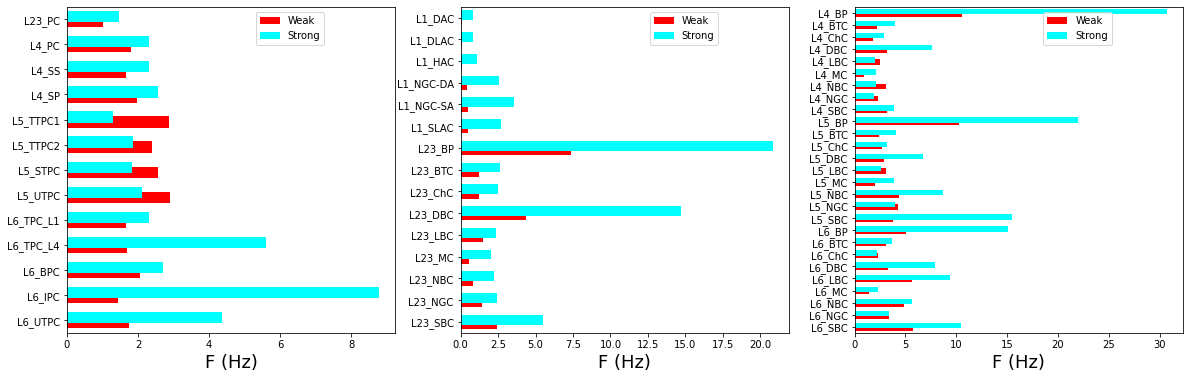

In [100]:
def compare3FR(paramsNameListtocompare):
    plt.figure(figsize=(20,6))
    widths = 0.45
    plt.subplot(1, 3, 1) 
    colorsbar = ['red', 'cyan']
    
    number = 0
    for paramsName in paramsNameListtocompare:
        popRates = []
        popNames = []
        number2 = 0
        for popName in Epops:
            popRates.append(data[paramsName]['simData']['popRates'][popName])
            popNames.append(popName)
            if paramsName == paramsNameListtocompare[0]:
#                 plt.text(1.63, number2 + 0.13, 'N=' + str(popNumber[popName]), fontsize=14)
                number2 = number2 + 1
        ind = np.arange(len(popNames))
        plt.barh(ind+0.1-0.2*number,popRates, widths, color=colorsbar[number], label=paramsName) 
        number = number + 1

    plt.ylim(12.5,-0.5)
#     plt.xlim(0,2.0)
    plt.xlabel('F (Hz)', fontsize=18)
    plt.yticks(ind, popNames, fontsize=10)
    plt.legend(loc='upper right', bbox_to_anchor=(0.8, 1.0))
    #----------------------------------------------------------------------------------
    plt.subplot(1, 3, 2)  
    number = 0
    for paramsName in paramsNameListtocompare:   
        popRates = []
        popNames = []
        number2 = 0
        for popName in Ipops[0:15]:
            popRates.append(data[paramsName]['simData']['popRates'][popName])
            popNames.append(popName)
            if paramsName == paramsNameListtocompare[0]:
#                 plt.text(0.84, number2 + 0.15, 'N=' + str(popNumber[popName]), fontsize=14)
                number2 = number2 + 1
        ind = np.arange(len(popNames))
        plt.barh(ind+0.1-0.2*number,popRates, widths, color=colorsbar[number], label=paramsName) 
        number = number + 1

    plt.ylim(14.5,-0.5)
#     plt.xlim(0,1.0)
    plt.xlabel('F (Hz)', fontsize=18)
    plt.yticks(ind, popNames, fontsize=10)
    plt.legend(loc='upper right', bbox_to_anchor=(0.8, 1.0))
    #----------------------------------------------------------------------------------
    plt.subplot(1, 3, 3)   
    number = 0
    for paramsName in paramsNameListtocompare:    
        popRates = []
        popNames = []
        number2 = 0
        for popName in Ipops[15:]:
            popRates.append(data[paramsName]['simData']['popRates'][popName])
            popNames.append(popName)
            if paramsName == paramsNameListtocompare[0]:
#                 plt.text(8.6, number2 + 0.28, 'N=' + str(popNumber[popName]), fontsize=12)  
                number2 = number2 + 1          
        ind = np.arange(len(popNames))
        plt.barh(ind+0.1-0.2*number,popRates, widths, color=colorsbar[number], label=paramsName) 
        number = number + 1

    plt.ylim(26.5,-0.5)
#     plt.xlim(0,10.0)
    plt.xlabel('F (Hz)', fontsize=18)
    plt.yticks(ind, popNames, fontsize=10)
    plt.legend(loc='upper right', bbox_to_anchor=(0.8, 1.0))
    
    namefig = 'FR_' + batchName + '_' 
    for paramsName in paramsNameListtocompare:    
         namefig = namefig + paramsName[5:] + '_' 
    namefig = namefig + '2.png'
    plt.savefig(namefig, facecolor = 'white', bbox_inches='tight' , dpi=300)
    
paramsNameListtocompare = [paramsNameList[0], paramsNameList[1]]
compare3FR(paramsNameListtocompare)

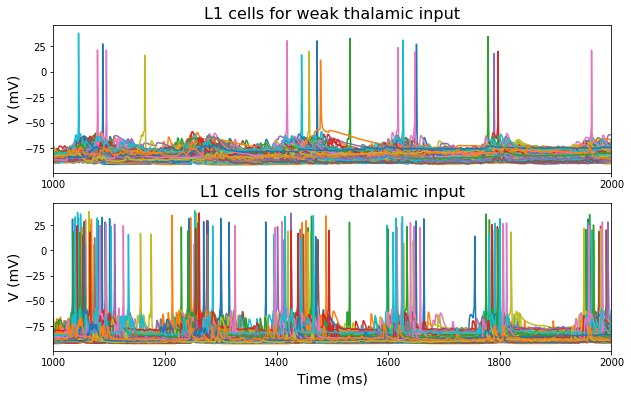

In [97]:
plt.figure(figsize=(10,6)) 
time = np.linspace(0, 2000, 20001)

popNames = ['L5_TTPC1','L5_TTPC2','L5_STPC','L5_UTPC']

popNames = ['L1_DAC','L1_DLAC','L1_HAC','L1_NGC-DA','L1_NGC-SA','L1_SLAC']

plt.subplot(2, 1, 1) 
for popName in popNames:
    for metype in popNameName[popName]:
        cellNames = cellNameName[metype]
        for cellName in cellNames:
            for paramsName in paramsNameList[0:1]:
                Vt = data[paramsName]['simData']['V_soma'][cellName]
                plt.plot(time, Vt, label=metype) 
#             plt.legend(loc='upper right', bbox_to_anchor=(1.185, 1.1), fontsize=8)
            plt.ylabel('V (mV)', fontsize=14)
            plt.xlim(1000, 2000)
            plt.xticks([1000, 2000])
            # plt.ylim(-80, -30)
            plt.title('L1 cells for weak thalamic input', fontsize=16)    
        
plt.subplot(2, 1, 2) 
for popName in popNames:
    for metype in popNameName[popName]:
        cellNames = cellNameName[metype]
        for cellName in cellNames:
            for paramsName in paramsNameList[1:2]:
                Vt = data[paramsName]['simData']['V_soma'][cellName]
                plt.plot(time, Vt, label=metype) 
    #         plt.legend(loc='upper right', bbox_to_anchor=(1.175, 1.0), fontsize=11)
            plt.ylabel('V (mV)', fontsize=14)
            plt.xlabel('Time (ms)', fontsize=14)
            plt.xlim(1000, 2000)
            # plt.ylim(-80, -30)
            plt.title('L1 cells for strong thalamic input', fontsize=16)     
 
        
plt.savefig('Vt_' + popName + '_' + batchName + '.png', facecolor = 'white', bbox_inches='tight' , dpi=300)

In [37]:
paramsNameList

['frac_Th_S1_0.0', 'frac_Th_S1_0.1', 'frac_Th_S1_0.5', 'frac_Th_S1_1.0']

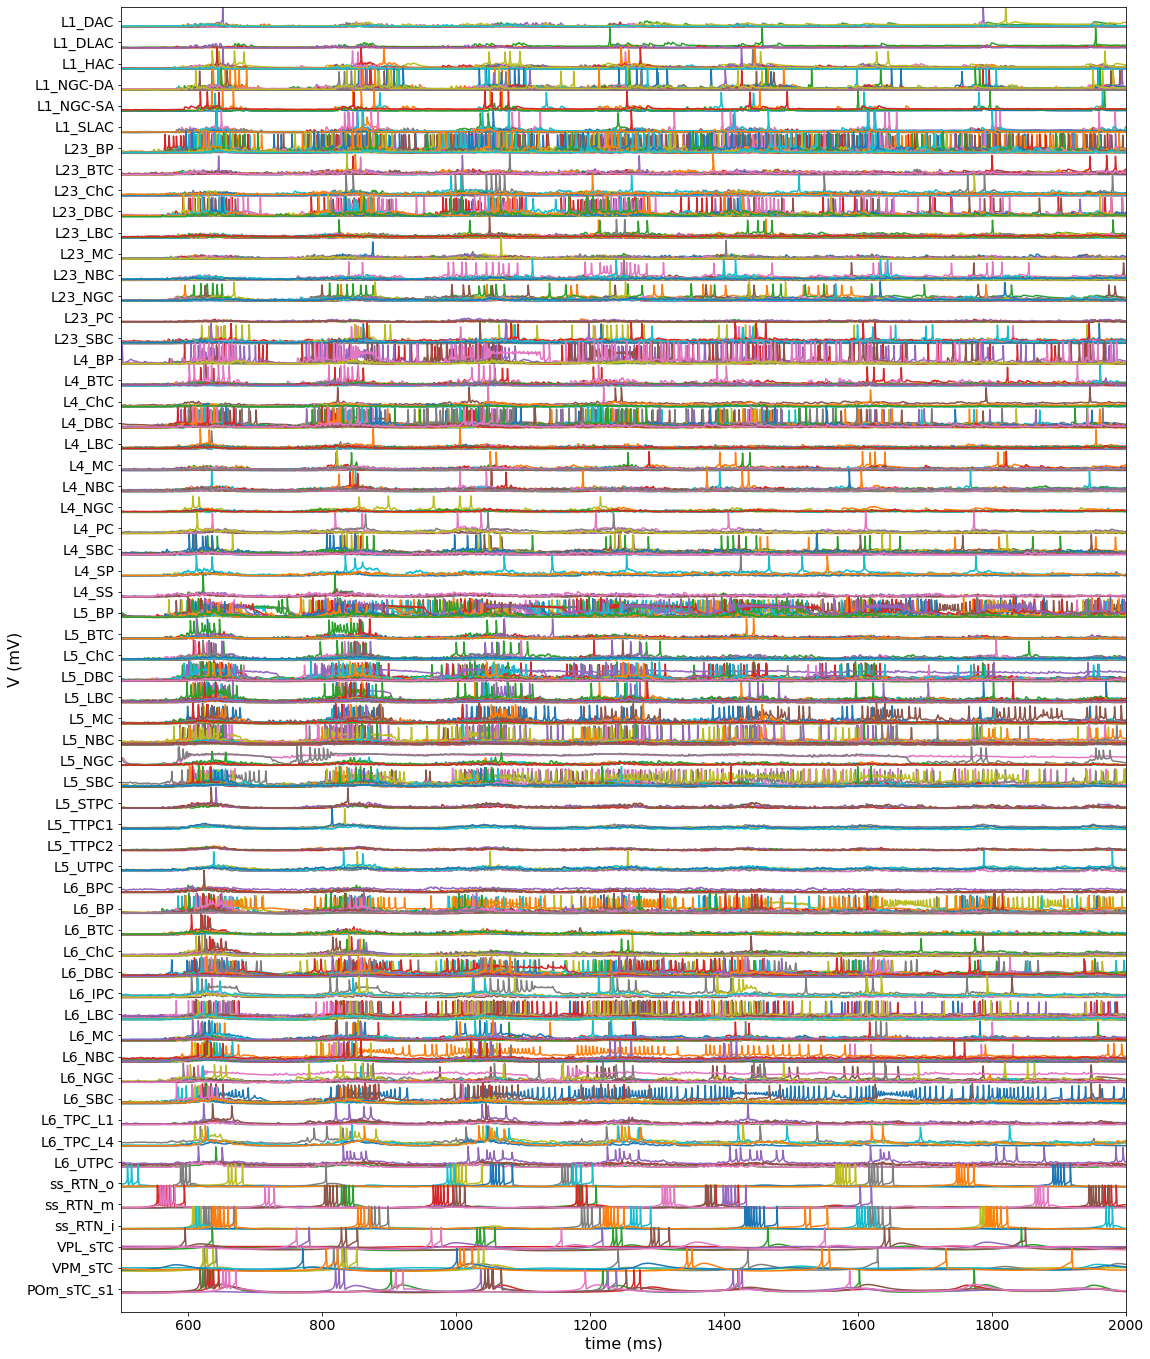

In [39]:
plt.figure(figsize=(18,24)) 
time = np.linspace(0, 2000, 20001)
plt.ylabel('V (mV)', fontsize=16)
plt.xlabel('time (ms)', fontsize=16)
plt.xlim(500, 2000)
# plt.ylim(-80, -30)
plt.ylim(-7390,20)
plt.yticks(np.arange(-7260,60,120),popParamLabels2[::-1], fontsize=14)
plt.xticks(fontsize=14)

paramsName = paramsNameList[1]
number = 0
for popName in popParamLabels2:   
    for metype in popNameName[popName]:
        cellNames = cellNameName[metype]
        for cellName in cellNames:
            Vt = np.array(data[paramsName]['simData']['V_soma'][cellName])
            plt.plot(time, (Vt-number*120.0)) 
    number = number + 1

plt.savefig('Vt_after-transient_' + paramsName + '.png', facecolor = 'white', bbox_inches='tight' , dpi=300)

In [67]:
np.sum(popID3)

38612

In [66]:
popID2 = []
popID3 = []
N = 0
for mtype in popNumber.keys():
    popID[mtype] = N
    popID2.append(N)
    N += popNumber[mtype]
    popID3.append(popNumber[mtype])
popID2.append(N)

In [76]:
# L1:6 L23:10 L4:12 L5:13 L6:14
np.sum(popID3[41:55])

12714

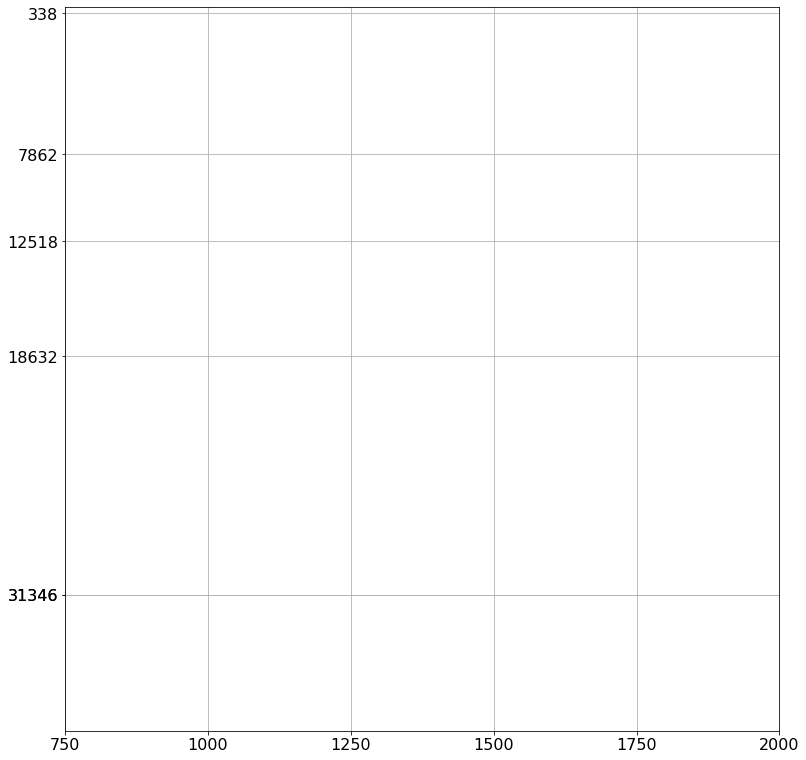

In [95]:
plt.figure(figsize=(12.8,13.32)) 
plt.xlim(750, 2000)
plt.ylim(38612,0)
plt.xticks([750,1000,1250,1500,1750,2000], fontsize=16)
plt.yticks([338,338+7524,338+7524+4656,338+7524+4656+6114,338+7524+4656+6114+12714,338+7524+4656+6114+12714,38612],fontsize=16)
plt.plot(time, Vt)
plt.grid(True)
plt.savefig('borders.png', bbox_inches='tight' , dpi=300)

In [60]:
popID = {}
N = 0
for mtype in popNumber.keys():
    popID[mtype] = N
    N += popNumber[mtype]
    

spkid = list(data[paramsName]['simData']['spkid'])
spkt = list(data[paramsName]['simData']['spkt'])
print('N =',N,', Number of spikes =',np.size(spkt),', FR =',np.size(spkt)/(2.0*N))

#after transient
mtype = 'L23_PC'
for mtype in popParamLabels:
    popName = mtype
    FRafter = []
    for i in range(np.size(spkt)):
        if spkid[i] >= popID[mtype] and spkid[i] < popID[mtype]+popNumber[mtype] and spkt[i] > 500.0:
    #         print('%.3f %.0f' % (spkt[i],spkid[i]))
            FRafter.append(spkt[i])
    print('%s (%d cells)\t %.3f\t %.3f\t'% (mtype,popNumber[mtype],np.size(FRafter)/(1.5*(popNumber[mtype])),data[paramsName]['simData']['popRates'][popName]))

N = 38612 , Number of spikes = 335808 , FR = 4.3484926965710144
L1_DAC (58 cells)	 0.333	 0.810	
L1_DLAC (24 cells)	 0.472	 0.833	
L1_HAC (91 cells)	 0.667	 1.093	
L1_NGC-DA (72 cells)	 2.222	 2.542	
L1_NGC-SA (52 cells)	 3.128	 3.538	
L1_SLAC (41 cells)	 1.951	 2.671	
L23_BP (28 cells)	 23.833	 20.875	
L23_BTC (104 cells)	 0.776	 2.591	
L23_ChC (61 cells)	 0.623	 2.508	
L23_DBC (175 cells)	 16.503	 14.689	
L23_LBC (456 cells)	 0.371	 2.334	
L23_MC (333 cells)	 0.194	 2.051	
L23_NBC (268 cells)	 0.254	 2.218	
L23_NGC (56 cells)	 0.976	 2.446	
L23_PC (5877 cells)	 0.004	 1.460	
L23_SBC (166 cells)	 4.759	 5.509	
L4_BP (8 cells)	 32.833	 30.750	
L4_BTC (20 cells)	 2.800	 3.975	
L4_ChC (8 cells)	 0.750	 2.938	
L4_DBC (40 cells)	 7.250	 7.575	
L4_LBC (122 cells)	 0.219	 1.992	
L4_MC (118 cells)	 0.299	 2.144	
L4_NBC (96 cells)	 0.396	 2.141	
L4_NGC (6 cells)	 0.889	 1.917	
L4_PC (2674 cells)	 1.221	 2.304	
L4_SBC (60 cells)	 2.600	 3.867	
L4_SP (1098 cells)	 1.396	 2.553	
L4_SS (406 cells)